In [2]:
# ████████╗ █████╗ ██████╗ ███████╗ █████╗     ██╗  ██╗
# ╚══██╔══╝██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██║  ██║
#    ██║   ███████║██████╔╝█████╗  ███████║    ███████║
#    ██║   ██╔══██║██╔══██╗██╔══╝  ██╔══██║    ╚════██║
#    ██║   ██║  ██║██║  ██║███████╗██║  ██║         ██║
#    ╚═╝   ╚═╝  ╚═╝╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝         ╚═╝

In [232]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import scipy as sci
import sympy as sym

1)

Según lo expuesto por el autor, el enfoque del integrador de Beeman se basa en las ecuaciones del algoritmo de Verlet, que se expresan de la siguiente manera:

$$
r_{n+1}=2r_n -r_{n-1}+h^2a_n
$$

y la evaluación en el punto medio de \(v_n\):

$$
v_n=\frac{r_{n+1}-r_{n-1}}{2h}
$$

Así, si partimos de la expansión en serie de Taylor de tercer orden para \(x(t+h)\), que se define como:

$$
x(t+\Delta t)=x(t)+v(t)\Delta t +a(t)\frac{\Delta t^2}{2}+a'(t)\frac{\Delta t^3}{6}+\mathcal{O}(h^4)
$$

que también puede expresarse como:

$$
x(t+\Delta t)=x(t)+v(t)\Delta t +a(t)\frac{\Delta t^2}{2}+a'(t)\frac{\Delta t^3}{6}+\mathcal{O}(h^4)
$$

donde la derivada de la aceleración, según Verlet, se define como:

$$
a'(t)=\frac{a(t+\Delta t)- a(t-\Delta t)}{2\Delta t}
$$

Al insertar este término en la expansión mencionada anteriormente, obtenemos:

$$
x(t+\Delta t)=x(t)+v(t)\Delta t +a(t)\frac{\Delta t^2}{2}+\frac{a(t+\Delta t)- a(t-\Delta t)}{12}\Delta t^2+\mathcal{O}(h^4)
$$

Por lo tanto, para derivar la ecuación del predictor, se tiene:

$$
\begin{align*}
x(t+\Delta t)&=x(t)+v(t)\Delta t +a(t)\frac{\Delta t^2}{2}+\frac{2a(t)-a(t+\Delta t)- a(t-\Delta t)}{12}\Delta t^2+\mathcal{O}(h^4)\\
&= x(t)+v(t\Delta t)+\frac{\Delta t^2}{6}(4a(t)-a(t-\Delta t))
\end{align*}
$$

Al expresar esto en forma de serie, utilizando \(\Delta t=h\), obtenemos:

$$
\begin{align}
r_{n+1}&=r_n +hv_n+\frac{h^2}{6}(4a_n -a_{n-1})
\end{align}
$$

Por otro lado, para el corrector de posición, tenemos:

$$
\begin{align*}
x(t+\Delta t)&=x(t)+v(t)\Delta t +a(t)\frac{\Delta t^2}{2}+\frac{-2a(t)+a(t+\Delta t)+ a(t-\Delta t)}{12}\Delta t^2+\mathcal{O}(h^4)\\
&= x(t)+v(t)\Delta t+\frac{\Delta t^2}{6}(4a(t)-a(t)-\Delta t)
\end{align*}
$$

Reescribiendo en forma de serie, obtenemos:

$$
\begin{align}
r_{n+1}&=r_n +hv_n+\frac{h^2}{6}(a_{n+1}+2a_{n})
\end{align}
$$

Finalmente, para obtener el corrector de la velocidad, tenemos:

$$
\begin{align}
hv_n&=x_n-x_{n-1}+h^2a_n-h^2,\frac{2a_n}{3}+h^2\frac{a_{n-1}}{6}\\
&=x_{n-1}-r_n+\frac{h^2}{6}(2a_{n+1}+a_n)
\end{align}
$$


El error de Beeman se presenta en los subíndices de la sumatoria, puesto que el término p, bajo el que se varía la sumatoria es aplicado solo en la constante, por lo que al hacer toda la sumatoria, solo se tendría una constante. No obstante, el término que debería variar es el de la aceleración , pero este cuenta con un subíndice basado en q y n, los cuales en una misma iteración son constantes, por lo que este término se podría sacar de la sumatoria si los subíndices fueran correctos.

2. Para tres puntos :


In [259]:
h, fn, fn1, fn2, t = sym.symbols("h fn fn1 fn2 t", real=True)

In [260]:
fs = np.array([fn2, fn1, fn])
ts = np.array([-2*h, -h, 0])


#lagrange y interpolación esta en el punto 4

# Realiza la interpolación
pol = Interpolate(t, ts, fs)

# Mostrar el polinomio interpolado
pol

fn*(h + t)*(2*h + t)/(2*h**2) - fn1*t*(2*h + t)/h**2 + fn2*t*(h + t)/(2*h**2)

In [261]:
integ=sym.integrate(pol,(t,0,h))
sym.simplify(integ)

h*(23*fn - 16*fn1 + 5*fn2)/12

Para 4 puntos 

In [262]:
h, fn, fn1, fn2, fn3, t = sym.symbols("h fn fn1 fn2 fn3 t", real=True)

#funcion de la grange y interpolador definida en el punto 4
fs = np.array([fn3, fn2, fn1, fn])
ts = np.array([-3*h, -2*h, -h, 0])

# Realiza la interpolación
pol = Interpolate(t, ts, fs)
pol


fn*(h + t)*(2*h + t)*(3*h + t)/(6*h**3) - fn1*t*(2*h + t)*(3*h + t)/(2*h**3) + fn2*t*(h + t)*(3*h + t)/(2*h**3) - fn3*t*(h + t)*(2*h + t)/(6*h**3)

In [263]:
# Integra el polinomio interpolado desde 0 hasta h
polinteg = sym.integrate(pol, (t, 0, h))
# Simplifica el resultado de la integración
polinteg_simplified = sym.simplify(polinteg)

# Mostrar el resultado simplificado
polinteg_simplified

h*(55*fn - 59*fn1 + 37*fn2 - 9*fn3)/24

3.

In [237]:
# Definir símbolos
h, fn, fn1, fn2, t = sym.symbols("h fn fn1 fn2 t", real=True)


#El siguiente codigo es de Alejandro de Metodos 1

def Lagrange(x, xi, j):
    """
    Calcula el j-ésimo polinomio de Lagrange L_j(x) para un conjunto de nodos xi
    y un punto x dado.
    """
    prod = 1
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i]) / (xi[j] - xi[i])
    
    return prod

def Interpolate(x, xi, yi):
    """
    Calcula el valor interpolado en x usando la interpolación polinómica de Lagrange
    basada en nodos xi y valores yi.
    """
    result = 0
    n = len(xi)
    
    for j in range(n):
        result += yi[j] * Lagrange(x, xi, j)
    
    return result

In [238]:
# Define los nodos y valores para la interpolación
fs3 = np.array([fn2, fn, fn1])
ts3 = np.array([-h, 0, h])

# Realiza la interpolación
pol = Interpolate(t, ts3, fs3)
print("Tenemos que nuestra interpolación es:")
pol

Tenemos que nuestra interpolación es:


-fn*(-h + t)*(h + t)/h**2 + fn1*t*(h + t)/(2*h**2) + fn2*t*(-h + t)/(2*h**2)

In [239]:
# Integra el polinomio interpolado desde 0 a h
polinteg3 = sym.integrate(pol, (t, 0, h))

# Simplifica el resultado de la integración
polinteg3_simplified = sym.simplify(polinteg3)

# Mostrar el resultado simplificado


print("Siendo que nuestro resultado final sea:")
polinteg3_simplified
   

Siendo que nuestro resultado final sea:


h*(8*fn + 5*fn1 - fn2)/12

Para 4 puntos


In [270]:
fs=np.array([fn_2,fn_1,f_n,fn1])
ts=np.array([-2*h,-h,0,h])
pol=Interpolate(t,ts,fs)
pol

-f_n*(-h + t)*(h + t)*(2*h + t)/(2*h**3) + f_{n-1}*t*(-h + t)*(2*h + t)/(2*h**3) - f_{n-2}*t*(-h + t)*(h + t)/(6*h**3) + fn1*t*(h + t)*(2*h + t)/(6*h**3)

In [271]:
integ=sym.integrate(pol,(t,0,h))
sym.simplify(integ)

h*(19*f_n - 5*f_{n-1} + f_{n-2} + 9*fn1)/24

4.

El método de Verlet se define mediante las siguientes ecuaciones:


\begin{align*}
\vec{r}_{n+1} &= \vec{r}_n + \vec{v}_n h + \frac{\vec{a}_n h^2}{2} \\
\vec{v}_{n+1} &= \vec{v}_n + \frac{h}{2}(\vec{a}_{n+1} + \vec{a}_n)
\end{align*}


A partir de estas ecuaciones, es necesario calcular las derivadas parciales para formar el jacobiano.


$$\frac{\partial \vec{r}_{n+1}}{\partial \vec{r}_n} = 1+\frac{a_n'h^2}{2}
\quad \frac{\partial \vec{v}_{n+1}}{\partial \vec{r}_n} = a_n'\frac{h}{2}
\quad \frac{\partial \vec{r}_{n+1}}{\partial \vec{v}_n} = h 
\quad \frac{\partial \vec{v}_{n+1}}{\partial \vec{v}_n} = 1$$



Con estas derivadas, el jacobiano se expresa como:


\begin{equation}
J =\begin{vmatrix}
\frac{\partial \vec{r}_{n+1}}{\partial \vec{r}_n} & \frac{\partial \vec{r}_{n+1}}{\partial \vec{v}_n} \\
\frac{\partial \vec{v}_{n+1}}{\partial \vec{r}_n} & \frac{\partial \vec{v}_{n+1}}{\partial \vec{v}_n}
\end{vmatrix}=
\begin{vmatrix}
 1+\frac{a_n'h^2}{2} & h \\
 a_n'\frac{h}{2} & 1
\end{vmatrix}
= 1+\frac{a_n'h^2}{2} - a_n'\frac{h^2}{2}  = 1
\end{equation}


Por lo tanto, al ser el jacobiano igual a 1, se puede concluir que el método es simpléctico.


6. a)


Partimos de la expansión en serie de Taylor para una función continua $y(t)$ alrededor de un punto $t$, tanto para $t + \Delta t$ como para $t - \Delta t$:

$$
y(t+\Delta t) = y(t) + y'(t)\Delta t + y''(t)\frac{\Delta t^2}{2} + y^{(3)}(t)\frac{\Delta t^3}{6} + \ldots
$$

$$
y(t-\Delta t) = y(t) - y'(t)\Delta t + y''(t)\frac{\Delta t^2}{2} - y^{(3)}(t)\frac{\Delta t^3}{6} + \ldots
$$

Al sumar ambas ecuaciones, los términos impares se cancelan y los términos pares se duplican, obteniendo:

$$
y(t+\Delta t) + y(t-\Delta t) = 2y(t) + 2y''(t)\frac{\Delta t^2}{2} + 2y^{(4)}(t)\frac{\Delta t^4}{24} + \mathcal{O}(\Delta t^6)
$$

Simplificando, obtenemos:

$$
y(t+\Delta t) + y(t-\Delta t) = 2y(t) + y''(t)\Delta t^2 + y^{(4)}(t)\frac{\Delta t^4}{12} + \mathcal{O}(\Delta t^6)
$$

Esto nos lleva a la aproximación para la ecuación en diferencias:

$$
y_{n+1} + y_{n-1} = 2y_n + y''_n h^2 + y^{(4)}_n \frac{h^4}{12} + \mathcal{O}(h^6)
$$

Para una ecuación diferencial de la forma:

$$
\frac{d^2y}{dx^2} - R(x)y = S(x)
$$

La expresión para $y''_n$ es:

$$
y''_n = R_n y_n + S_n
$$

La cuarta derivada, $y^{(4)}_n$, se aproxima como:

$$
y^{(4)}_n = \frac{R_{n+1}y_{n+1} + S_{n+1} - 2(R_ny_n + S_n) + R_{n-1}y_{n-1} + S_{n-1}}{h^2}
$$

Sustituyendo $y''_n$ y $y^{(4)}_n$ en la ecuación en diferencias obtenemos:

$$
y_{n+1} + y_{n-1} = 2y_n + (R_ny_n + S_n)h^2 + \left(\frac{R_{n+1}y_{n+1} + S_{n+1} - 2(R_ny_n + S_n) + R_{n-1}y_{n-1} + S_{n-1}}{h^2}\right)\frac{h^4}{12} + \mathcal{O}(h^6)
$$

Simplificando y reorganizando los términos, llegamos a una forma que relaciona $y_{n+1}$, $y_n$, y $y_{n-1}$ con $R_n$, $S_n$ y sus valores adyacentes. Este es el resultado final ajustado para la implementación en ecuaciones diferenciales específicas.

LLegando a que,
$$
\Big(-R_{n+1}\frac{h^2}{12}+1 \Big)y_{n+1}-2\Big(1+R_n\frac{5h^2}{12}\Big)y_n+\Big(1-R_{n}\frac{h^2}{12}+1 \Big)y_{n-1}=(10S_n+S_{n+1}+S_{n-1})\frac{h^2}{12}+\mathcal{O}(\Delta t^6)
$$


c)

In [3]:
N = 1000
x = np.linspace(-5,5,N)

d)

In [4]:
def potencial(x):
    return x**2/2

e)

In [208]:
def numerov(x,V,E):
    
    p=np.zeros_like(x)
    p[0]=0
    p[1]=1e-5
    
    
    h=x[1]-x[0]
    
    R=2*m*(V(x)- E)/H**2
    
    
    
    for i in range (2,len(p)):
        
        numerador = ((-12+h**2*R[i-2])*p[i-2] )+(2*(12+5*h**2*R[i-1])*p[i-1])
        denominador = 12-h**2*R[i]
        
        p[i]= numerador / denominador
        
    return p

f)

In [193]:
dE = 0.001

g)

In [198]:
H = 1
m = 1

V_E=[]
valores = []
E=0
while len(V_E)<6:
    p1=Numerov(x,potencial,E)
    p2=Numerov(x,potencial,E+dE)
    if p1[-1]*p2[-1]<0:
        V_E.append(round(E,3))
        valores.append(p1)
        print(E)
    E=E+dE

print(V_E)

0.5000000000000003
1.4999999999999456
2.4999999999998357
3.4999999999997256
4.4999999999998375
5.500000000000171
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]


h ) 

<IPython.core.display.Javascript object>


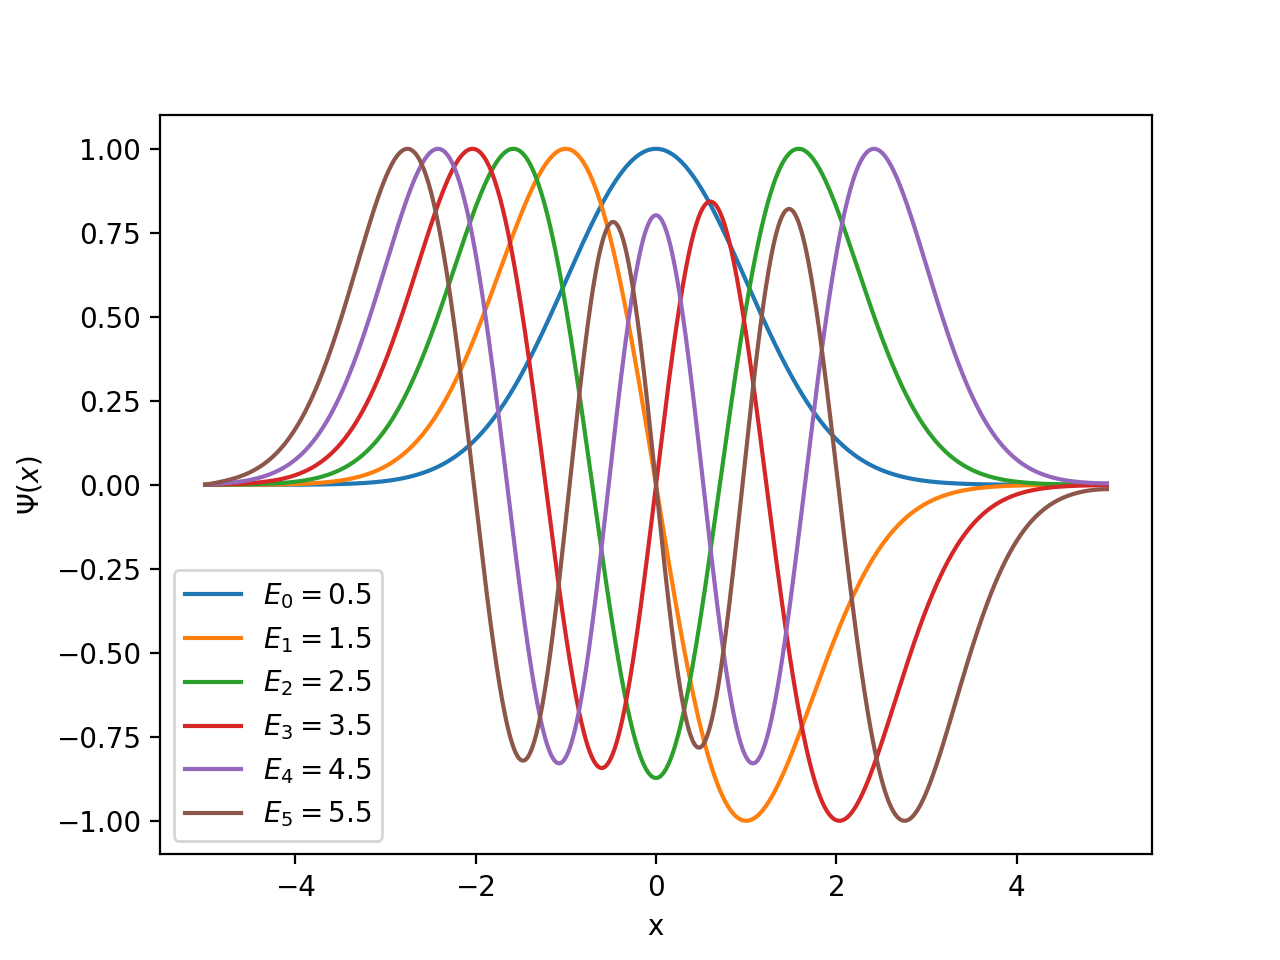

In [199]:
for every in range(0,len(valores)):
    Nume = valores[every]
    max_ = np.max(Nume)
    plt.plot(x,Nume/max_, label = "$E_{%s} = %s$"%(every,V_E[every]))

plt.ylabel("$\Psi(x)$")    
plt.xlabel(" x ")
plt.legend()

i)

In [209]:
#Segunda función de potencia 
def potencia2(x):
    return -10*np.e**(-x**2/20)

In [215]:
V_E_2=[]
valores2 = []
E = -10
while len(V_E_2)<5:
    p1=numerov(x,potencia2,E)
    p2=numerov(x,potencia2,E+dE)
    if p1[-1]*p2[-1]<0:
        V_E_2.append(round(E,3))
        valores2.append(p1)
        print(E)
    E += dE

V_E_2

-9.510000000000272
-8.548000000000805
-7.625000000000983
-6.742000000000688
-5.899000000000407


[-9.51, -8.548, -7.625, -6.742, -5.899]

<IPython.core.display.Javascript object>


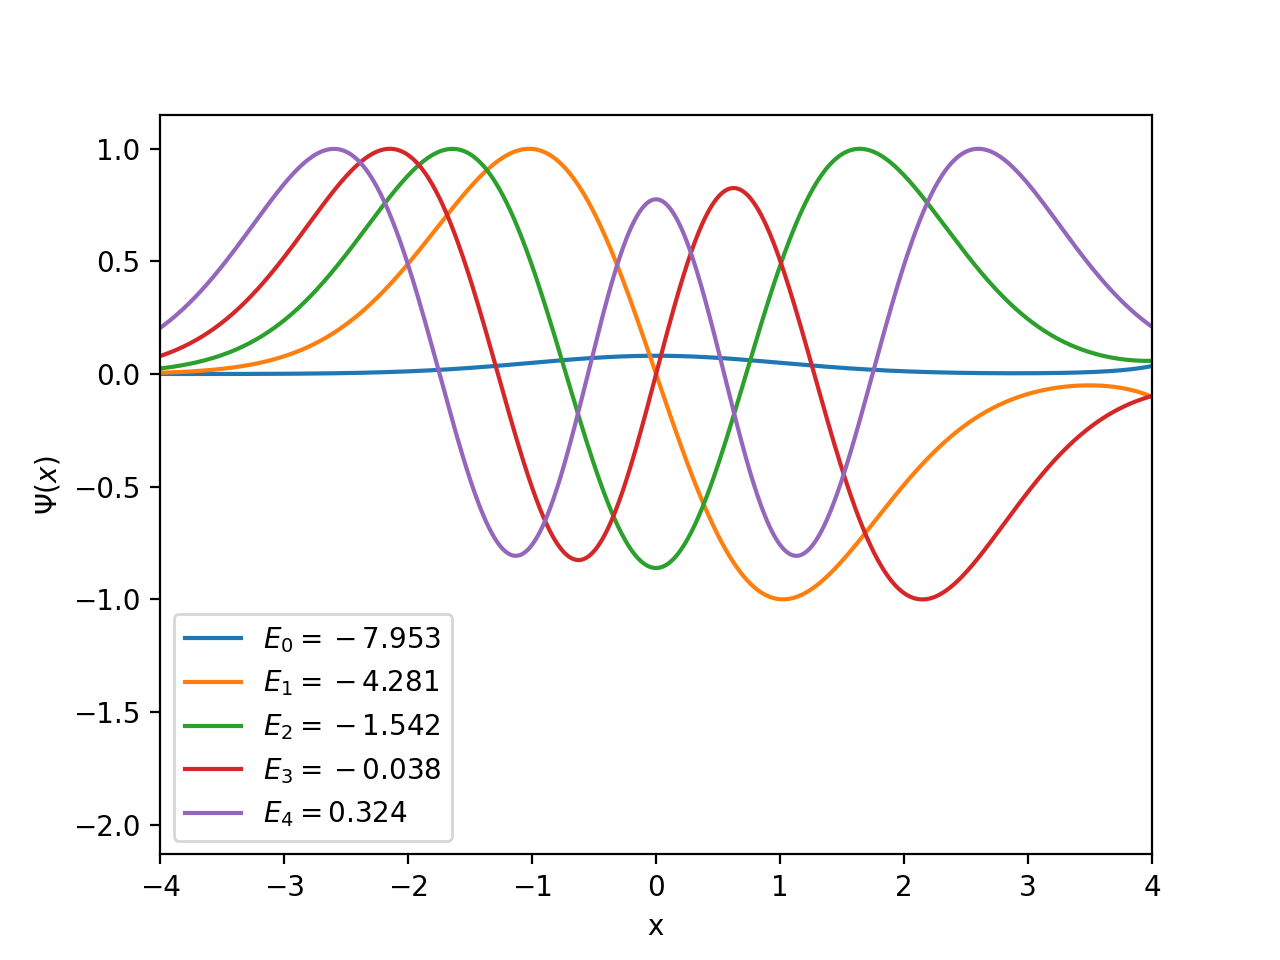

(-4.0, 4.0)

In [217]:
for every in range(0,len(valores2)):
    Nume = valores2[every]
    max_ = np.max(Nume)
    plt.plot(x,Nume/max_, label = "$E_{%s} = %s$"%(every,E_V_2[every]))

plt.ylabel("$\Psi(x)$")    
plt.xlabel(" x ")
plt.legend()
plt.xlim(-4, 4)

j)

In [219]:
def potencia3(x):
    return -4/(1+x**2)**2

In [222]:
dE = 0.01
V_E_3=[]
valores3 = []
E = -3
while len(V_E_3)<2:
    p1=numerov(x,potencia3,E)
    p2=numerov(x,potencia3,E+dE)
    if p1[-1]*p2[-1]<0:
        V_E_3.append(round(E,3))
        valores3.append(p1)
        print(E)
    E=E+dE

V_E_3


-2.480000000000011
-0.4300000000000199


[-2.48, -0.43]

<IPython.core.display.Javascript object>


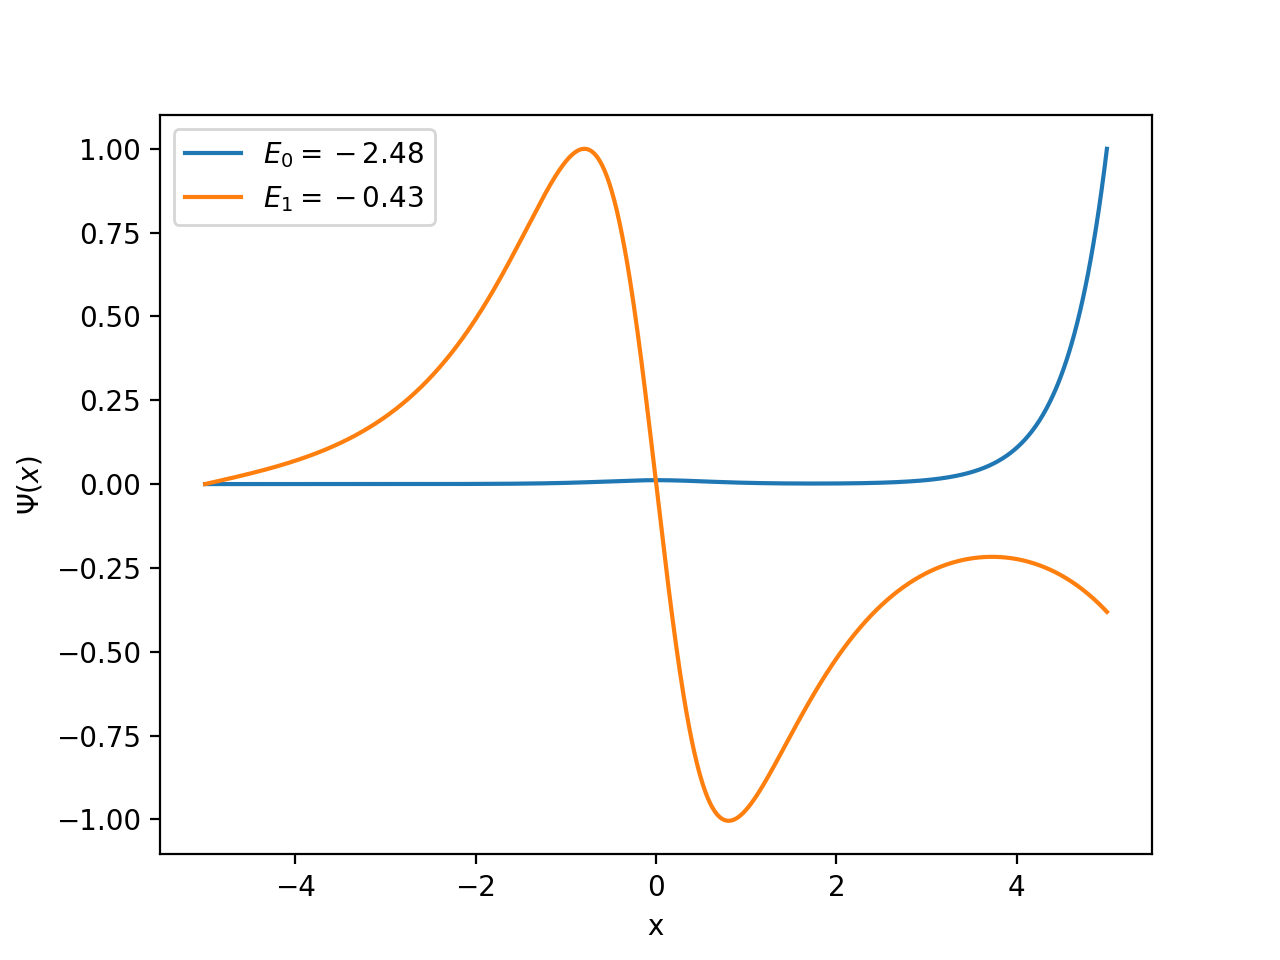

In [227]:
for every in range(0,len(valores3)):
    Nume = valores3[every]
    max_ = np.max(Nume)
    plt.plot(x,Nume/max_, label = "$E_{%s} = %s$"%(every,V_E_3[every]))

plt.ylabel("$\Psi(x)$")    
plt.xlabel(" x ")
plt.legend()